<a href="https://colab.research.google.com/github/Sravya-Duvvuri/Traffic/blob/main/AudioTry3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
!ls

drive  sample_data


In [6]:
import zipfile
import os
import librosa
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, f1_score
from sklearn.ensemble import GradientBoostingClassifier


In [7]:
import zipfile

# Path to the zip file in Google Drive
zip_file_path = "/content/drive/My Drive/archive.zip"

# Destination directory to extract the contents
extracted_dir = "/content/traffic"

# Extract the contents of the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_dir)


In [8]:
import os
import librosa
import numpy as np

# Set the path to the dataset folder
data_dir = "/content/traffic/sounds"

# Define a list of valid audio extensions
valid_audio_extensions = ['.wav', '.mp3', '.flac', '.ogg', '.m4a']  # Add other extensions as needed

# Load and preprocess audio data using spectrograms
labels = os.listdir(data_dir)
audio_data = []
target_labels = []

for label in labels:
    label_dir = os.path.join(data_dir, label)
    if os.path.isdir(label_dir):  # Ensure it's a directory
        for audio_file in os.listdir(label_dir):
            audio_path = os.path.join(label_dir, audio_file)
            # Check if the file has a valid audio extension
            if os.path.splitext(audio_file)[1].lower() in valid_audio_extensions:
                try:
                    y, sr = librosa.load(audio_path, duration=3)  # Load audio and limit to 3 seconds
                    spectrogram = librosa.feature.melspectrogram(y=y, sr=sr)
                    spectrogram = librosa.power_to_db(spectrogram, ref=np.max)
                    # Transpose the spectrogram to have the shape (timesteps, n_mels)
                    spectrogram = spectrogram.T
                    audio_data.append(spectrogram)
                    target_labels.append(label)
                except Exception as e:
                    print(f"Error loading {audio_path}: {e}")

# Convert lists to numpy arrays
audio_data = np.array(audio_data)
target_labels = np.array(target_labels)

# Check the shapes of the data
print(f"Shape of audio_data: {audio_data.shape}")
print(f"Shape of target_labels: {target_labels.shape}")


Shape of audio_data: (600, 130, 128)
Shape of target_labels: (600,)


In [9]:
# Encode target labels
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(target_labels)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(audio_data, encoded_labels, test_size=0.2, random_state=42)

# Ensure all spectrograms have the same shape
max_length = max([spec.shape[0] for spec in audio_data])
X_train = [np.pad(spec, ((0, max_length - spec.shape[0]), (0, 0)), mode='constant') for spec in X_train]
X_test = [np.pad(spec, ((0, max_length - spec.shape[0]), (0, 0)), mode='constant') for spec in X_test]

# Convert to NumPy arrays
X_train = np.array(X_train)
X_test = np.array(X_test)


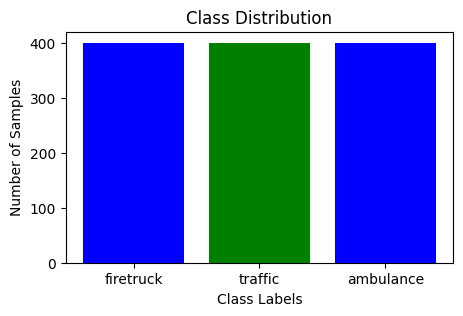

In [10]:
import os
import matplotlib.pyplot as plt

# Set the path to the dataset folder
data_dir = "/content/traffic/sounds"

# Get the labels (subdirectories)
labels = os.listdir(data_dir)

# Count the number of samples in each class
class_counts = [len(os.listdir(os.path.join(data_dir, label))) for label in labels]

# Define colors for each class (make sure the number of colors matches the number of labels)
class_colors = ['blue', 'green']  # Adjust or extend this list if you have more than 2 classes

# Create a bar chart to visualize class distribution
plt.figure(figsize=(5, 3))
plt.bar(labels, class_counts, color=class_colors)
plt.xlabel("Class Labels")
plt.ylabel("Number of Samples")
plt.title("Class Distribution")
plt.show()


Available classes: ['firetruck', 'traffic', 'ambulance']
Label directory: /content/traffic/sounds/ambulance
Found 200 audio files in ambulance directory.
Files: ['sound_150.wav', 'sound_37.wav', 'sound_187.wav', 'sound_63.wav', 'sound_152.wav', 'sound_1.wav', 'sound_104.wav', 'sound_200.wav', 'sound_19.wav', 'sound_20.wav', 'sound_126.wav', 'sound_96.wav', 'sound_142.wav', 'sound_106.wav', 'sound_129.wav', 'sound_75.wav', 'sound_191.wav', 'sound_105.wav', 'sound_70.wav', 'sound_171.wav', 'sound_68.wav', 'sound_183.wav', 'sound_176.wav', 'sound_174.wav', 'sound_25.wav', 'sound_89.wav', 'sound_60.wav', 'sound_161.wav', 'sound_16.wav', 'sound_39.wav', 'sound_131.wav', 'sound_97.wav', 'sound_149.wav', 'sound_49.wav', 'sound_162.wav', 'sound_83.wav', 'sound_116.wav', 'sound_144.wav', 'sound_27.wav', 'sound_185.wav', 'sound_53.wav', 'sound_167.wav', 'sound_139.wav', 'sound_24.wav', 'sound_177.wav', 'sound_151.wav', 'sound_66.wav', 'sound_35.wav', 'sound_87.wav', 'sound_115.wav', 'sound_112.w

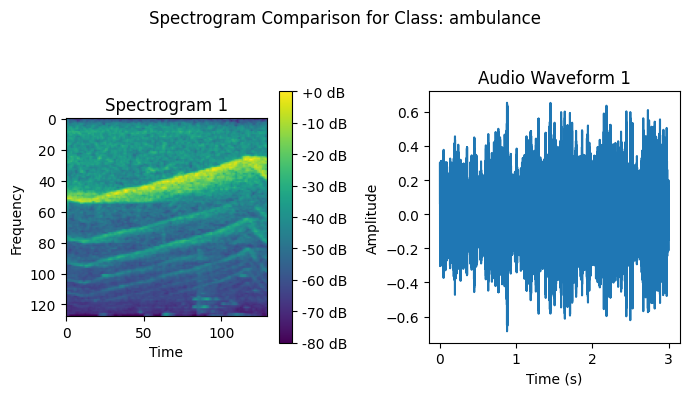

Label directory: /content/traffic/sounds/firetruck
Found 200 audio files in firetruck directory.
Files: ['sound_232.wav', 'sound_260.wav', 'sound_239.wav', 'sound_202.wav', 'sound_367.wav', 'sound_320.wav', 'sound_351.wav', 'sound_265.wav', 'sound_332.wav', 'sound_287.wav', 'sound_293.wav', 'sound_350.wav', 'sound_279.wav', 'sound_348.wav', 'sound_384.wav', 'sound_219.wav', 'sound_386.wav', 'sound_211.wav', 'sound_247.wav', 'sound_355.wav', 'sound_297.wav', 'sound_369.wav', 'sound_396.wav', 'sound_341.wav', 'sound_393.wav', 'sound_356.wav', 'sound_375.wav', 'sound_311.wav', 'sound_201.wav', 'sound_371.wav', 'sound_205.wav', 'sound_388.wav', 'sound_303.wav', 'sound_269.wav', 'sound_327.wav', 'sound_249.wav', 'sound_220.wav', 'sound_257.wav', 'sound_337.wav', 'sound_301.wav', 'sound_238.wav', 'sound_344.wav', 'sound_228.wav', 'sound_230.wav', 'sound_296.wav', 'sound_292.wav', 'sound_233.wav', 'sound_250.wav', 'sound_278.wav', 'sound_256.wav', 'sound_268.wav', 'sound_290.wav', 'sound_289.

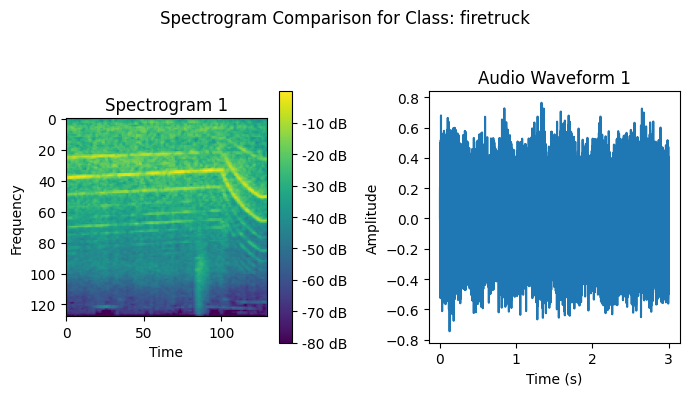

In [11]:
import os
import librosa
import numpy as np
import matplotlib.pyplot as plt

# Set the path to the dataset folder
data_dir = "/content/traffic/sounds"

# List the available classes (subdirectories) in the dataset folder
labels = os.listdir(data_dir)
print("Available classes:", labels)

# Define a function to plot spectrograms for a class
def plot_spectrograms(label, num_samples=3):
    label_dir = os.path.join(data_dir, label)

    # Debugging: Print the label directory
    print(f"Label directory: {label_dir}")

    if not os.path.exists(label_dir):
        print(f"Directory '{label_dir}' does not exist.")
        return

    plt.figure(figsize=(7, 4))
    plt.suptitle(f"Spectrogram Comparison for Class: {label}")

    # Filter out non-audio files
    audio_files = [f for f in os.listdir(label_dir) if any(f.endswith(ext) for ext in ['.wav', '.mp3', '.flac', '.ogg', '.m4a'])]

    print(f"Found {len(audio_files)} audio files in {label} directory.")
    print("Files:", audio_files)

    for i, audio_file in enumerate(audio_files[:num_samples]):
        audio_path = os.path.join(label_dir, audio_file)
        try:
            y, sr = librosa.load(audio_path, duration=3)
            spectrogram = librosa.feature.melspectrogram(y=y, sr=sr)
            spectrogram = librosa.power_to_db(spectrogram, ref=np.max)

            plt.subplot(num_samples, 2, i * 2 + 1)
            plt.title(f"Spectrogram {i + 1}")
            plt.imshow(spectrogram, cmap="viridis")
            plt.colorbar(format="%+2.0f dB")
            plt.xlabel("Time")
            plt.ylabel("Frequency")

            plt.subplot(num_samples, 2, i * 2 + 2)
            plt.title(f"Audio Waveform {i + 1}")
            plt.plot(np.linspace(0, len(y) / sr, len(y)), y)
            plt.xlabel("Time (s)")
            plt.ylabel("Amplitude")

        except Exception as e:
            print(f"Error loading {audio_path}: {e}")

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

# Update these class names with the actual class names from your dataset
plot_spectrograms("ambulance", num_samples=1)
plot_spectrograms("firetruck", num_samples=1)

In [12]:
!pwd
!ls

/content
drive  sample_data  traffic


In [13]:
import os
import librosa
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split

# Set the path to the dataset folder
data_dir = "/content/traffic/sounds"

# List the available classes (subdirectories) in the dataset folder
labels = os.listdir(data_dir)
print("Available classes:", labels)

# Initialize lists to store features and labels
X = []
y = []

# Define a function to extract features from audio files
def extract_features(audio_path):
    try:
        y, sr = librosa.load(audio_path, duration=3)
        spectrogram = librosa.feature.melspectrogram(y=y, sr=sr)
        spectrogram = librosa.power_to_db(spectrogram, ref=np.max)
        # Assuming you want to use flattened spectrogram as features
        flattened_spectrogram = spectrogram.flatten()
        return flattened_spectrogram
    except Exception as e:
        print(f"Error loading {audio_path}: {e}")
        return None

# Iterate through each class directory and extract features
for label in labels:
    label_dir = os.path.join(data_dir, label)
    audio_files = [f for f in os.listdir(label_dir) if any(f.endswith(ext) for ext in ['.wav', '.mp3', '.flac', '.ogg', '.m4a'])]
    for audio_file in audio_files:
        audio_path = os.path.join(label_dir, audio_file)
        features = extract_features(audio_path)
        if features is not None:
            X.append(features)
            y.append(label)

# Convert lists to numpy arrays
X = np.array(X)
y = np.array(y)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Flatten X_train into X_train_flat
X_train_flat = X_train.reshape(X_train.shape[0], -1)

# Create Gradient Boosting classifier
model = GradientBoostingClassifier(random_state=42)

# Train the model
model.fit(X_train_flat, y_train)

# Flatten X_test into X_test_flat
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Make predictions on test data and evaluate
y_pred = model.predict(X_test_flat)

# Calculate accuracy and F1 score
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')  # or 'macro'
print("Accuracy: {:.4f}".format(accuracy))
print("F1 score: {:.4f}".format(f1))

# Now, proceed with the prediction for police1.wav
# Set the path to the test audio file
test_audio_path = '/content/drive/My Drive/Test/traffic.wav'

# Define a function to extract features from the test audio file
def extract_features_test(audio_path):
    try:
        y, sr = librosa.load(audio_path, duration=3)
        spectrogram = librosa.feature.melspectrogram(y=y, sr=sr)
        spectrogram = librosa.power_to_db(spectrogram, ref=np.max)
        flattened_spectrogram = spectrogram.flatten()
        return flattened_spectrogram
    except Exception as e:
        print(f"Error loading {audio_path}: {e}")
        return None

# Extract features from the test audio file
test_features = extract_features_test(test_audio_path)

if test_features is not None:
    # Reshape test_features to match the shape used during training
    test_features_flat = test_features.reshape(1, -1)

    # Make prediction using the trained model
    predicted_label = model.predict(test_features_flat)[0]

    # Print the predicted label
    print(f"Predicted label: {predicted_label}")

    # Convert predicted label back to original class label using label_encoder
    label_encoder = LabelEncoder()
    label_encoder.fit(y)  # Fit label encoder on all possible classes y

    # Handle the case where predicted_label is not a numeric index but a class label
    predicted_class = predicted_label

    # Print the predicted class
    print(f"Predicted class is: {predicted_class}") #print function needs to be changed acc to file name
else:
    print("Feature extraction failed. Check the audio file.")


Available classes: ['firetruck', 'traffic', 'ambulance']
Accuracy: 0.9000
F1 score: 0.9006
Predicted label: traffic
Predicted class is: traffic
